# MIE1624 Assignment 1

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import random

In [3]:
url = "clean_kaggle_data.csv"
df = pd.read_csv(url)
df

/var/folders/7z/6tf98rc93hs5zf3rfz6g5_zm0000gn/T/ipykernel_9220/474526398.py:2: DtypeWarning: Columns (285) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15386,25967,323,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15387,25968,910,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15388,25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15389,25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


### Q1

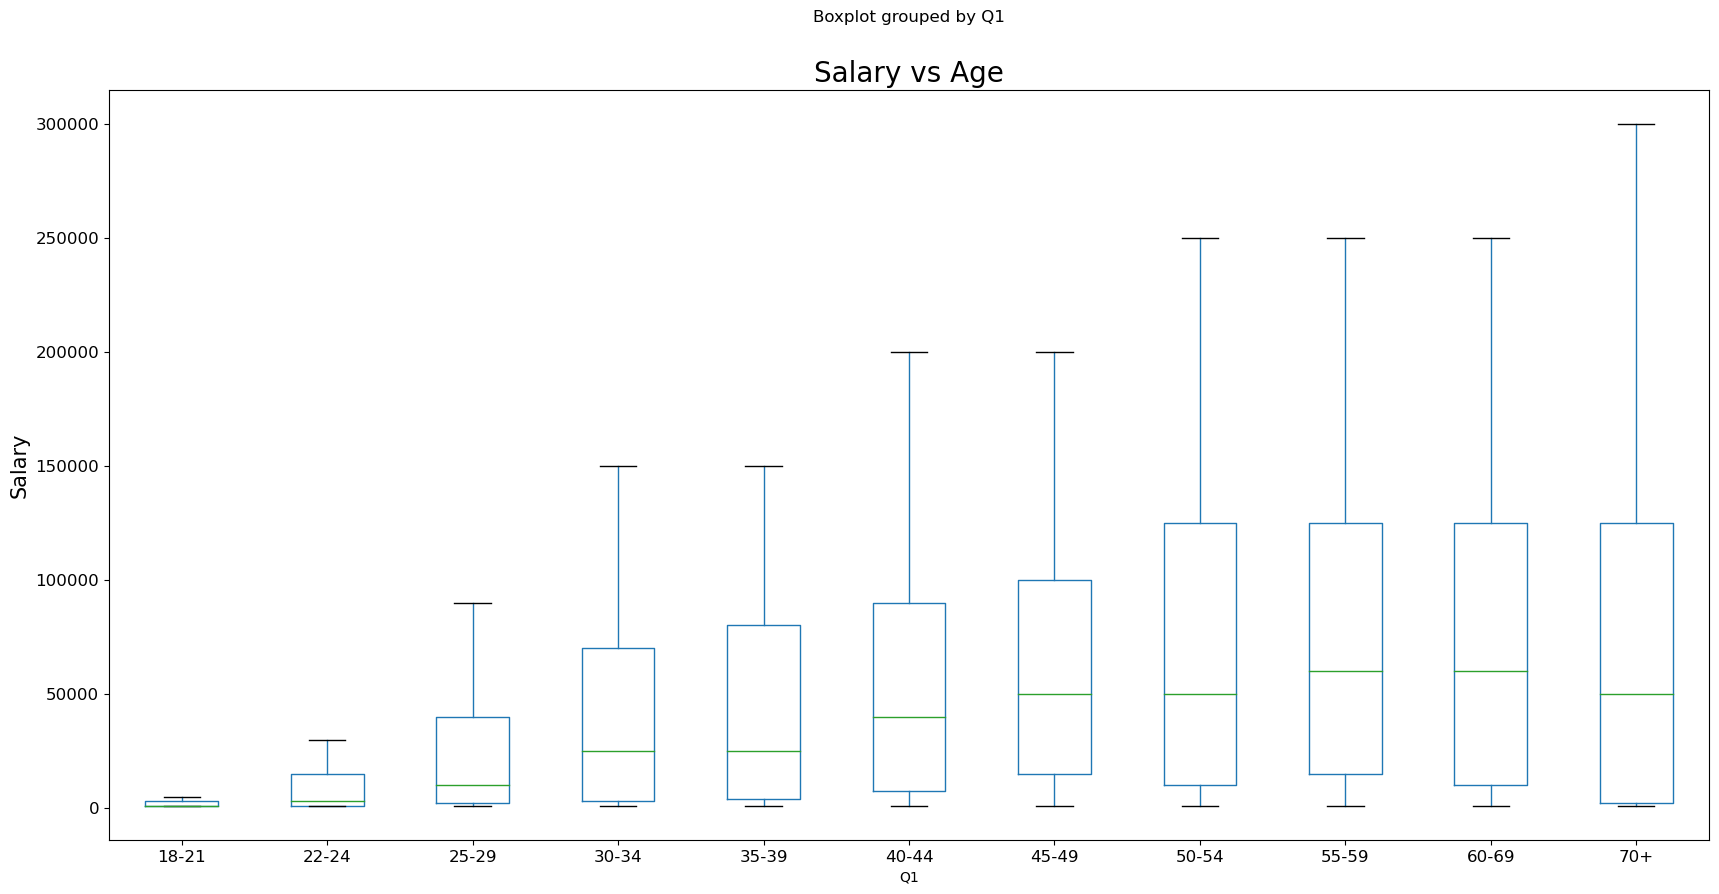

In [3]:
df.boxplot(column='Q25', by='Q1', showfliers=False, grid=False,fontsize=12,figsize=(20,10))
plt.title('Salary vs Age',fontsize=20)
plt.ylabel('Salary',fontsize=15)
plt.show()

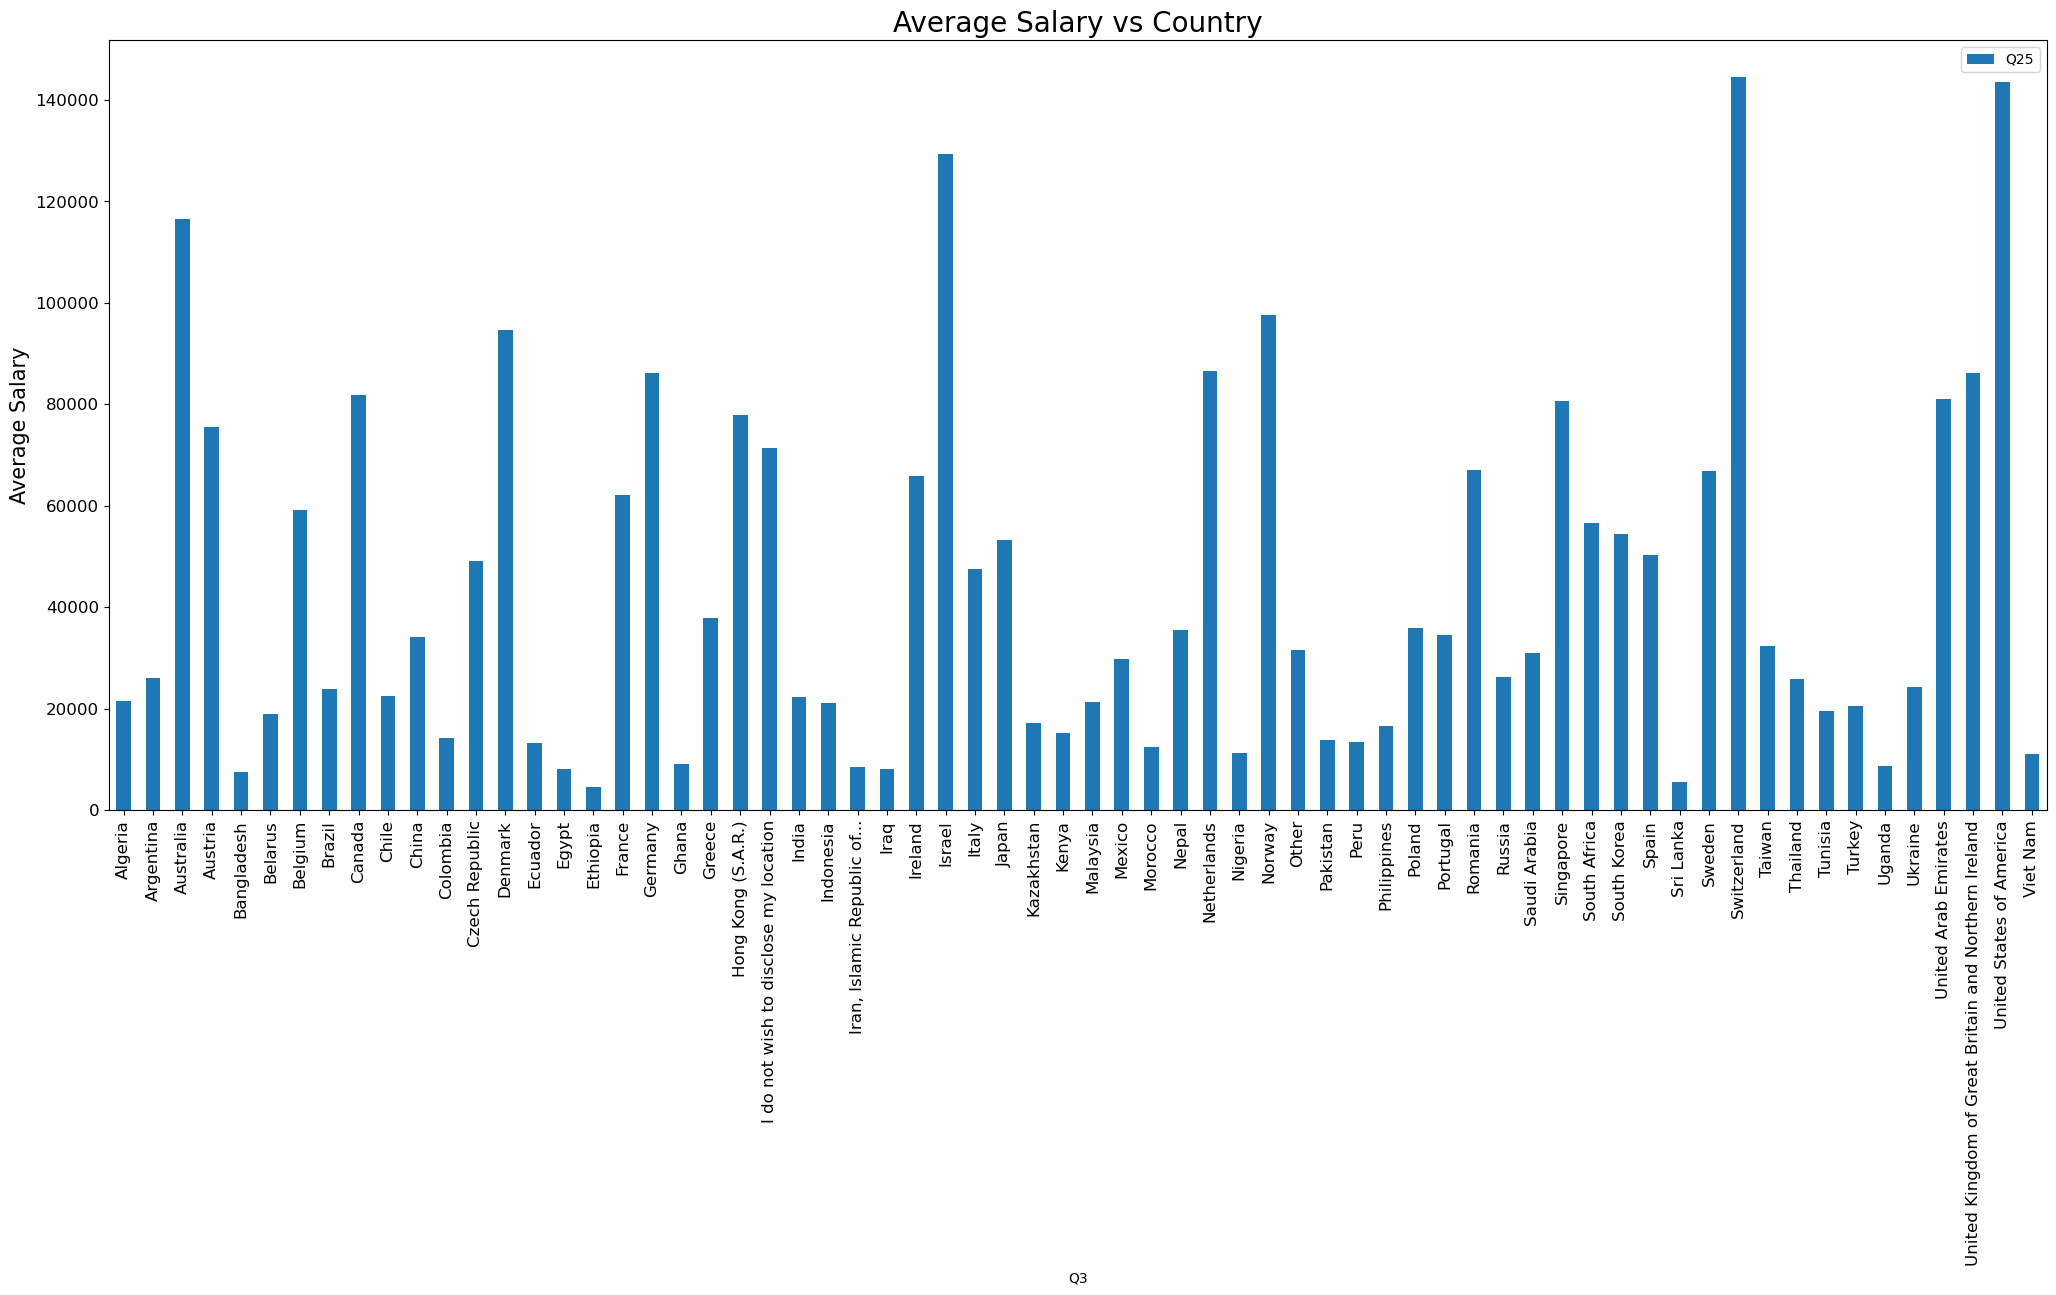

In [4]:
df_country = pd.DataFrame(df.groupby(['Q3'])['Q25'].mean())
df_country.plot.bar(fontsize=12,figsize=(25,10))
plt.title('Average Salary vs Country',fontsize=20)
plt.ylabel('Average Salary',fontsize=15)
plt.show()

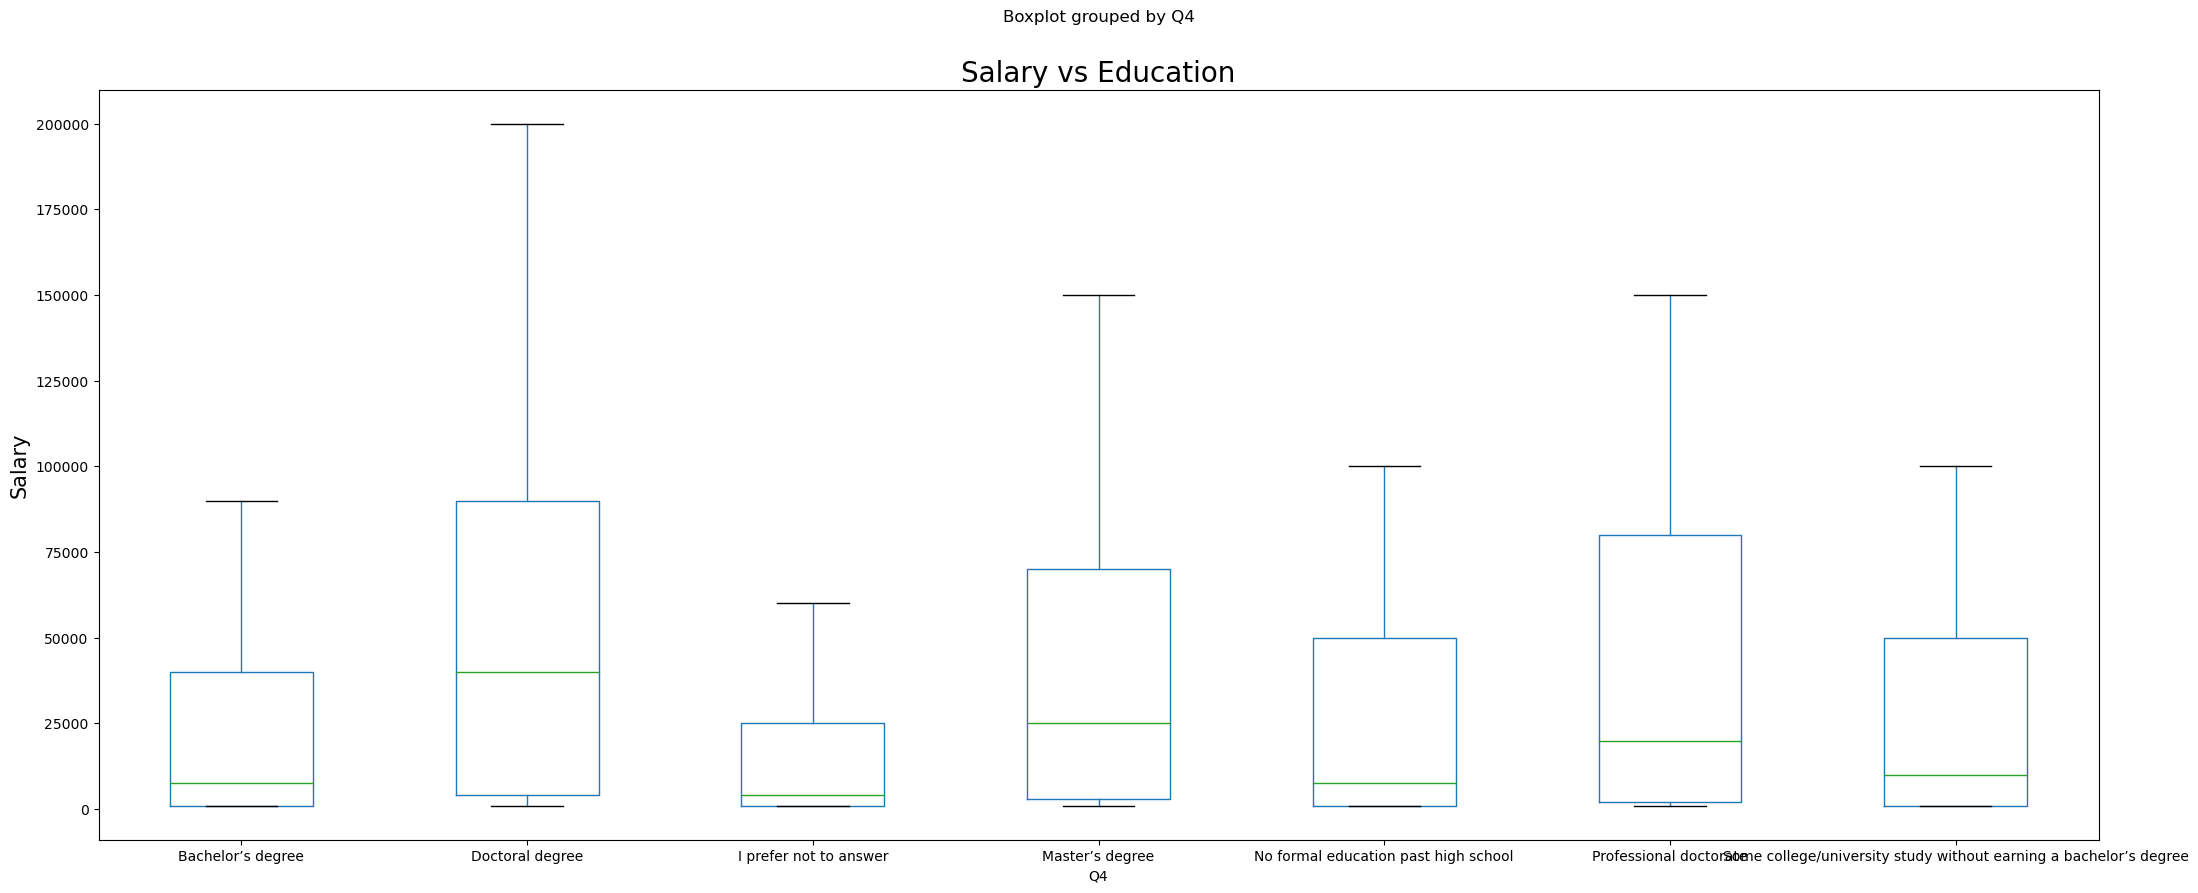

In [5]:
df.boxplot(column='Q25', by='Q4', showfliers=False, grid=False,fontsize=10,figsize=(25,10))
plt.title('Salary vs Education',fontsize=20)
plt.ylabel('Salary',fontsize=15)
plt.show()

### Q2

### a.

In [6]:
df_w = df[df['Q2'] == 'Woman']
df_m = df[df['Q2'] == 'Man']

In [7]:
df_w[['Q25']].describe()

,Q25
count,2482.000000
mean,34816.881547
std,72017.347888
min,1000.000000
25%,1000.000000
50%,7500.000000
75%,50000.000000
max,1000000.000000


In [8]:
df_m[['Q25']].describe()

,Q25
count,12642.000000
mean,51193.600696
std,99979.274378
min,1000.000000
25%,2000.000000
50%,20000.000000
75%,60000.000000
max,1000000.000000


### b.

In [9]:
df_female = df[df['Q2'] == 'Woman']['Q25']
df_male = df[df['Q2'] == 'Man']['Q25']
tc, pc = stats.ttest_ind(df_female, df_male)
print ("t-test: t = %g  p = %g" % (tc, pc))

t-test: t = -7.77406  p = 8.08881e-15


### c.

In [10]:
s_man = df[df['Q2'] == 'Man']['Q25'].values
s_woman = df[df['Q2'] == 'Woman']['Q25'].values
bs_man = []
bs_woman = []
for i in range(1000):
    yman = random.choices(s_man.tolist(), k=len(s_man))
    bs_man.append(np.mean(yman))
    ywoman = random.choices(s_woman.tolist(), k=len(s_woman))
    bs_woman.append(np.mean(ywoman))


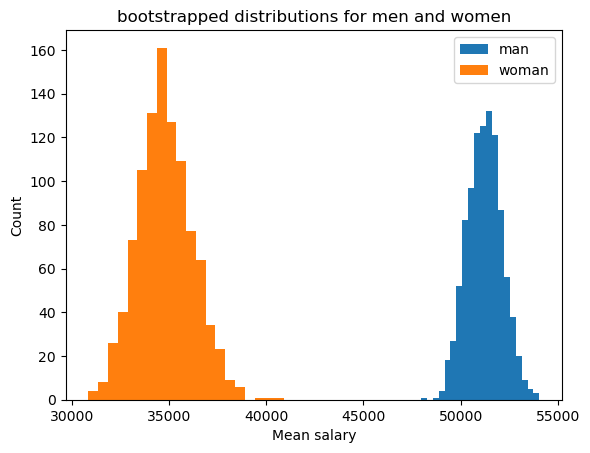

In [11]:
plt.hist(bs_man, 20, label = 'man')
plt.hist(bs_woman, 20, label = 'woman')
plt.title('bootstrapped distributions for men and women')
plt.xlabel('Mean salary')
plt.ylabel('Count')
plt.legend()
plt.show()

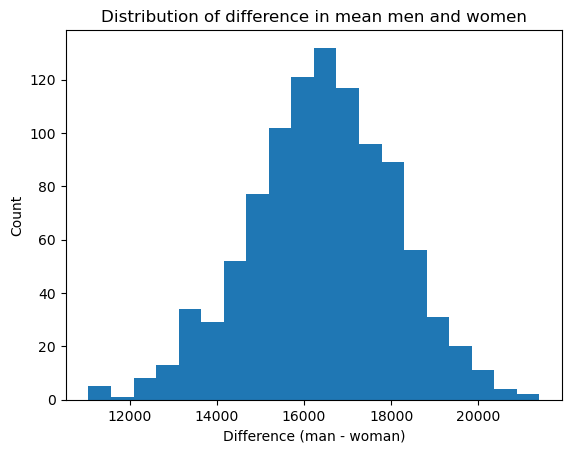

In [12]:
plt.hist(np.subtract(bs_man,bs_woman), 20)
plt.title('Distribution of difference in mean men and women')
plt.xlabel('Difference (man - woman)')
plt.ylabel('Count')
plt.show()

### d.

In [13]:
tc, pc = stats.ttest_ind(bs_man, bs_woman)
print ("t-test: t = %g  p = %g" % (tc, pc))

t-test: t = 309.155  p = 0


### Q3.

### a.

In [14]:
df_ba = df[df['Q4'] == 'Bachelor’s degree']
df_ma = df[df['Q4'] == 'Master’s degree']
df_do = df[df['Q4'] == 'Doctoral degree']

In [15]:
df_ba[['Q25']].describe()

,Q25
count,4777.000000
mean,35578.291815
std,89382.060777
min,1000.000000
25%,1000.000000
50%,7500.000000
75%,40000.000000
max,1000000.000000


In [16]:
df_ma[['Q25']].describe()

,Q25
count,6799.000000
mean,52706.868657
std,90928.786678
min,1000.000000
25%,3000.000000
50%,25000.000000
75%,70000.000000
max,1000000.000000


In [17]:
df_do[['Q25']].describe()

,Q25
count,2217.000000
mean,70641.181777
std,117160.947589
min,1000.000000
25%,4000.000000
50%,40000.000000
75%,90000.000000
max,1000000.000000


### b.

In [18]:
fc, pc = stats.f_oneway(df_ba[['Q25']],df_ma[['Q25']],df_do[['Q25']])
print ("ANOVA: statistic value = %g  p = %g" % (fc, pc))

ANOVA: statistic value = 109.758  p = 5.1077e-48


### c.

In [19]:
s_ba = df_ba['Q25'].values
s_ma = df_ma['Q25'].values
s_do = df_do['Q25'].values
bs_ba = []
bs_ma = []
bs_do = []
for i in range(1000):
    yba = random.choices(s_ba.tolist(), k=len(s_ba))
    bs_ba.append(np.mean(yba))
    yma = random.choices(s_ma.tolist(), k=len(s_ma))
    bs_ma.append(np.mean(yma))
    ydo = random.choices(s_do.tolist(), k=len(s_do))
    bs_do.append(np.mean(ydo))


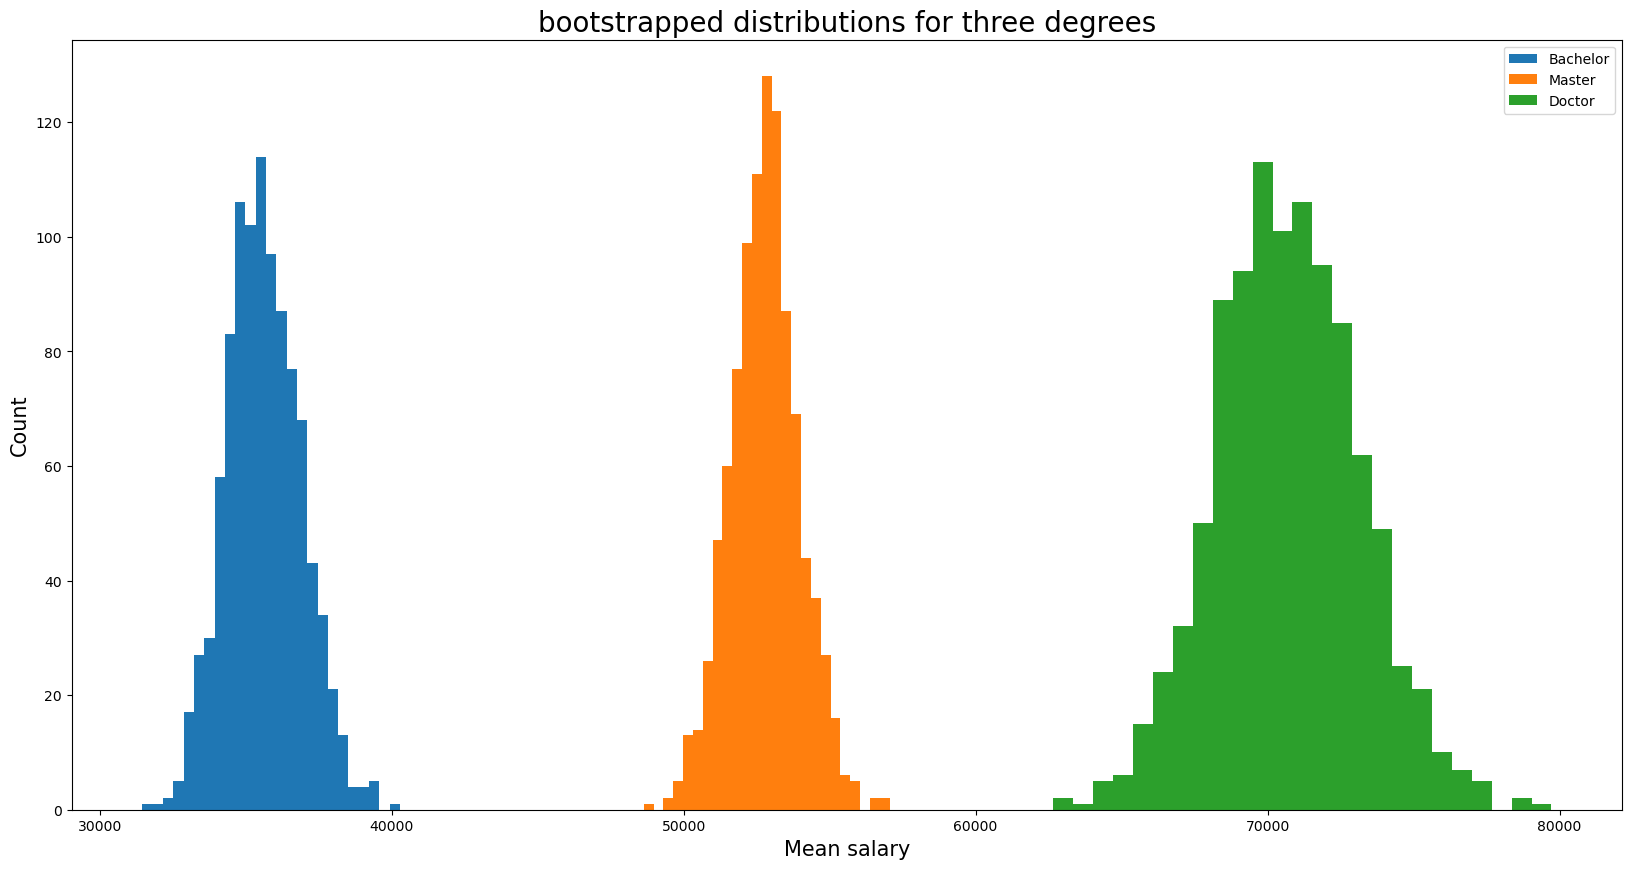

In [20]:
plt.figure(figsize=(20,10))
plt.hist(bs_ba, 25, label = 'Bachelor')
plt.hist(bs_ma, 25, label = 'Master')
plt.hist(bs_do, 25, label = 'Doctor')
plt.title('bootstrapped distributions for three degrees',fontsize=20)
plt.xlabel('Mean salary',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend()
plt.show()

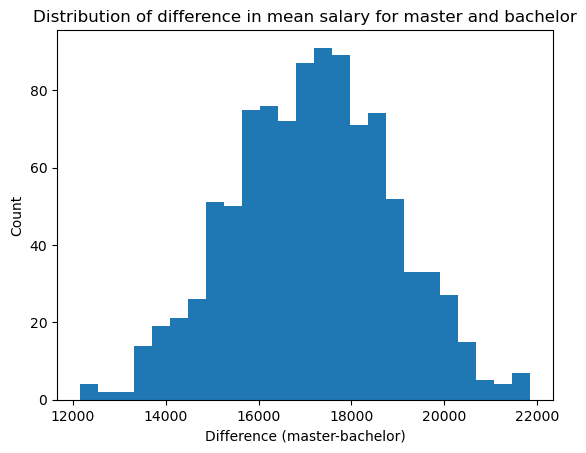

In [21]:
plt.hist(np.subtract(bs_ma,bs_ba), 25)
plt.title('Distribution of difference in mean salary for master and bachelor')
plt.xlabel('Difference (master-bachelor)')
plt.ylabel('Count')
plt.show()

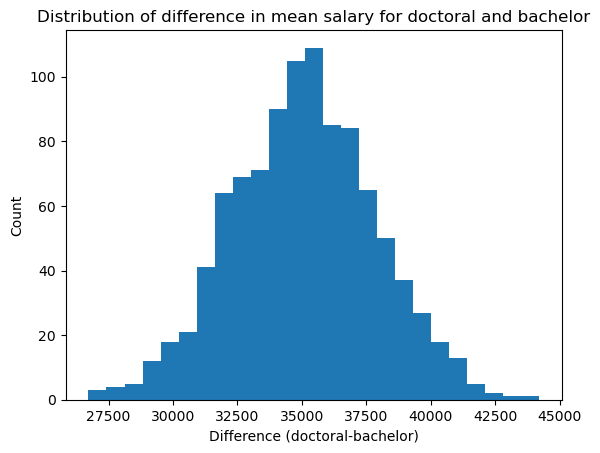

In [22]:
plt.hist(np.subtract(bs_do,bs_ba), 25)
plt.title('Distribution of difference in mean salary for doctoral and bachelor')
plt.xlabel('Difference (doctoral-bachelor)')
plt.ylabel('Count')
plt.show()

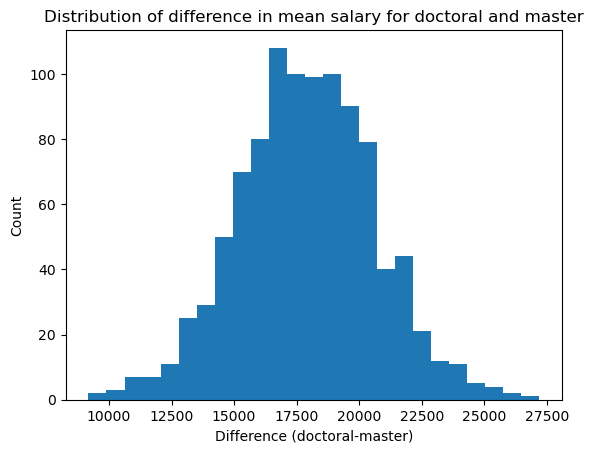

In [23]:
plt.hist(np.subtract(bs_do,bs_ma), 25)
plt.title('Distribution of difference in mean salary for doctoral and master')
plt.xlabel('Difference (doctoral-master)')
plt.ylabel('Count')
plt.show()

### d.

In [24]:
fc, pc = stats.f_oneway(bs_ma,bs_ma,bs_do)
print ("ANOVA: statistic value = %g  p = %g" % (fc, pc))

ANOVA: statistic value = 36047  p = 0
